<a href="https://colab.research.google.com/github/kundanpandit/DATA_MINING_PRACTICALS/blob/main/Copy_of_datamining5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np


In [2]:
from sklearn.datasets import load_iris

In [3]:
df=load_iris()


In [4]:
x=df.data
y=df.target
df=pd.DataFrame(x,columns=df['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

**HOLD OUT METHOD**


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [7]:
dt = DecisionTreeClassifier(criterion='entropy')
comparision1=[]
dt.fit(x_train,y_train)
print("Accuracy on the test data")
dt_accuracy_HoldOut = dt.score(x_test,y_test)
comparision1.append(dt_accuracy_HoldOut * 100)
print(f"Decision tree accuracy: {dt_accuracy_HoldOut * 100}%")



Accuracy on the test data
Decision tree accuracy: 92.10526315789474%


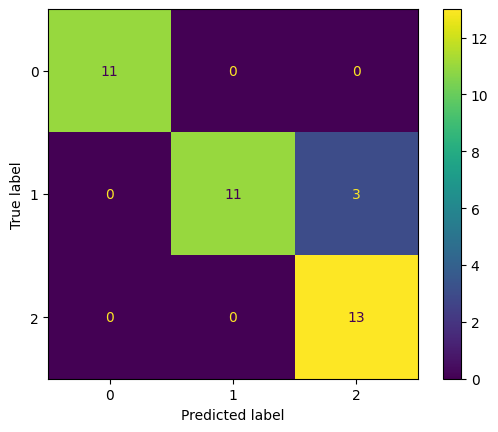

In [8]:
deci_tree = DecisionTreeClassifier(criterion='entropy') 
deci_tree.fit(x_train,y_train)

ConfusionMatrixDisplay.from_estimator(deci_tree, x_test, y_test)

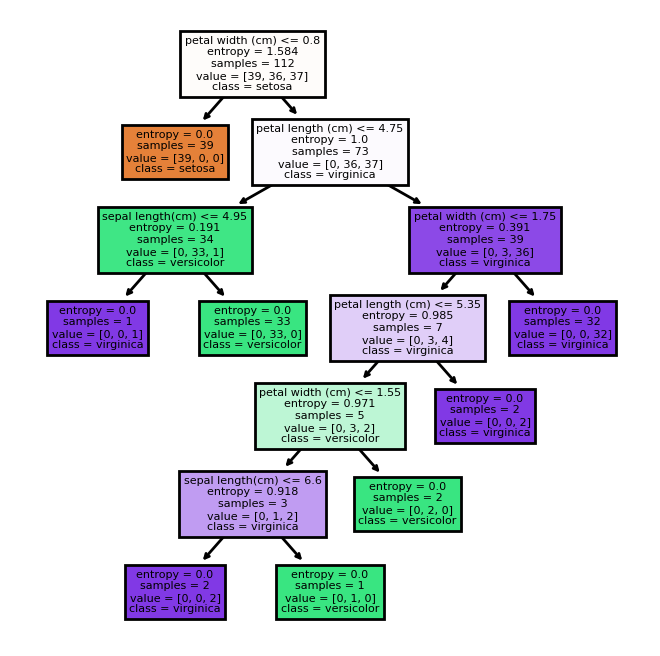

In [9]:
fn=['sepal length(cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
fig,axes = plt.subplots(nrows = 1,ncols=1,figsize=(4,4),dpi=200)
tree.plot_tree(dt,
               feature_names=fn,
               class_names=cn,
               filled=True);


In [10]:
nb = CategoricalNB()
comparision2=[]
nb.fit(x_train,y_train)
print("Accuracy on the test data")
nb_accuracy_HoldOut = nb.score(x_test,y_test)
comparision2.append(nb_accuracy_HoldOut * 100)
print(f"Naives Bayes accuracy: {nb_accuracy_HoldOut * 100}%")

Accuracy on the test data
Naives Bayes accuracy: 97.36842105263158%


In [11]:
kn = KNeighborsClassifier()
comparision3=[]
kn.fit(x_train,y_train)
print("Accuracy on the test data")
kn_accuracy_HoldOut = kn.score(x_test,y_test)
comparision3.append(kn_accuracy_HoldOut * 100)
print(f"K-nearest accuracy: {kn_accuracy_HoldOut * 100}%")

Accuracy on the test data
K-nearest accuracy: 94.73684210526315%


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [13]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
print("Accuracy on the test data")
dt_accuracy_HoldOut = dt.score(x_test,y_test)
print(f"Decision tree accuracy: {dt_accuracy_HoldOut * 100}%")

Accuracy on the test data
Decision tree accuracy: 95.55555555555556%


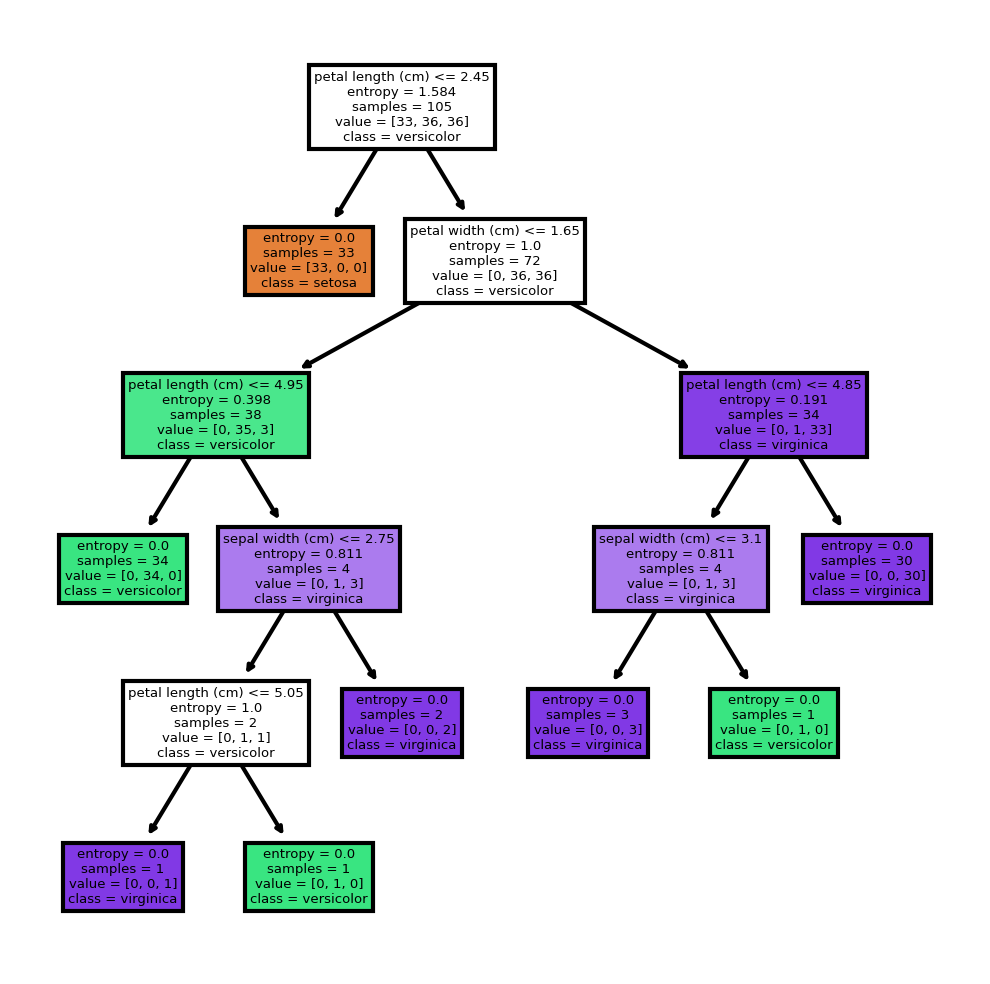

In [14]:
fn=['sepal length(cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
fig,axes = plt.subplots(nrows = 1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dt,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [15]:
nb = CategoricalNB()
nb.fit(x_train,y_train)
print("Accuracy on the test data")
nb_accuracy_HoldOut = nb.score(x_test,y_test)
print(f"Naives Bayes accuracy: {nb_accuracy_HoldOut * 100}%")

Accuracy on the test data
Naives Bayes accuracy: 93.33333333333333%


In [16]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
print("Accuracy on the test data")
kn_accuracy_HoldOut = kn.score(x_test,y_test)
print(f"K-nearest accuracy: {kn_accuracy_HoldOut * 100}%")

Accuracy on the test data
K-nearest accuracy: 97.77777777777777%


**Random Subsampling**

In [17]:
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
    dt.fit(x_train, y_train)
    dta.append(dt.score(x_test, y_test))
print(f"Decision tree accuracy: {np.mean(dta)*100}%")
comparision1.append(np.mean(dta)*100)

Decision tree accuracy: 94.55555555555556%


In [18]:
nba = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
    nb.fit(x_train, y_train)
    nba.append(nb.score(x_test, y_test))
print(f"Naives Bayes accuracy: {np.mean(nba) * 100}%")
comparision2.append(np.mean(nba) * 100)

Naives Bayes accuracy: 92.66666666666667%


In [19]:
kna = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
    kn.fit(x_train, y_train)
    kna.append(kn.score(x_test, y_test))
print(f"K-nearest accuracy: {np.mean(kna)* 100}%")
comparision3.append(np.mean(kna) * 100)

K-nearest accuracy: 95.66666666666667%


**CROSS VALIDATION**

In [20]:

dta = cross_val_score(dt,x,y,cv=10)
print(f"Decision tree accuracy: {np.mean(dta)*100}%")
comparision1.append(np.mean(dta)*100)


Decision tree accuracy: 95.33333333333334%


In [21]:
nba = cross_val_score(nb,x,y,cv=10)
print(f"Naives Bayes accuracy: {np.mean(nba) * 100}%")
comparision2.append(np.mean(nba) * 100)

Naives Bayes accuracy: 92.66666666666666%


In [22]:

kna = cross_val_score(kn,x,y,cv=10)
print(f"K-nearest accuracy: {np.mean(kna)* 100}%")
comparision3.append(np.mean(kna) * 100)

K-nearest accuracy: 96.66666666666669%


**COMPARISON**

In [23]:
print("Decision Tree ")
print("Hold out " ,comparision1[0])
print("Random Subsampling " ,comparision1[1])
print("Cross validation " ,comparision1[2])

Decision Tree 
Hold out  92.10526315789474
Random Subsampling  94.55555555555556
Cross validation  95.33333333333334


In [24]:
print("naive bayes")
print("Hold out " ,comparision2[0])
print("Random Subsampling " ,comparision2[1])
print("Cross validation " ,comparision2[2])

naive bayes
Hold out  97.36842105263158
Random Subsampling  92.66666666666667
Cross validation  92.66666666666666


In [25]:
print("k nearest")
print("Hold out " ,comparision3[0])
print("Random Subsampling " ,comparision3[1])
print("Cross validation " ,comparision3[2])

k nearest
Hold out  94.73684210526315
Random Subsampling  95.66666666666667
Cross validation  96.66666666666669
